In [1]:
from articles_library import Articles
from selenium_wrapper import SeleniumWrapper
from nltk import WordNetLemmatizer
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

## Create an Object of Class Articles

In [3]:
articles = Articles()
# number of articles in a dataset
articles.nrows()

10117

## Preprocessing

In [15]:
# fill missing data
articles.fill_missing_data()
# convert into lowercase
for col in ['Title','Abstract']: articles.to_lower(col) 
# remove punctuation 
for col in ['Title','Abstract']: articles.remove_punctuation(col) 
# remove stopwords
for col in ['Title','Abstract']: articles.remove_stopwords(col) 
# lemmatize
for col in ['Title','Abstract']: articles.lemmatize(col) 
# pick a random sample of 10 articles
articles.sample(10)

,Abstract,Authors,Journal_Conference,Pdf_url,Title,Volume,Year
3317,metric learning seek transformation feature sp...,"Nakul Verma,Kristin Branson",NIPS,https://papers.nips.cc/paper/5811-sample-compl...,sample complexity learning mahalanobis distanc...,-,2015
8829,deep learning enabled remarkable progress last...,"Thomas Elsken, Jan Hendrik Metzen, Frank Hutter",JMLR,http://jmlr.org/papers/v20/18-598.pdf,neural architecture search survey,20,2019
8408,investigate general framework multiplicative m...,"Xin Wang, Jinbo Bi, Shipeng Yu, Jiangwen Sun, ...",JMLR,http://jmlr.org/papers/v17/15-234.pdf,multiplicative multitask feature learning,17,2016
4663,usability brain computer interface bci based p...,"Pieter-jan Kindermans,Hannes Verschore,David V...",NIPS,https://papers.nips.cc/paper/4775-a-p300-bci-f...,p300 bci mass prior information enables instan...,-,2012
2194,,Giacomo Indiveri,NIPS,https://papers.nips.cc/paper/2331-neuromorphic...,neuromorphic bisable vlsi synapsis spiketiming...,-,2002
3331,extend theory boosting regression problem onli...,"Alina Beygelzimer,Elad Hazan,Satyen Kale,Haipe...",NIPS,https://papers.nips.cc/paper/5725-online-gradi...,online gradient boosting,-,2015
9406,real world application graphical statistical m...,"Junning Li, Z. Jane Wang",JMLR,http://jmlr.org/papers/v10/li09a.pdf,controlling false discovery rate associationca...,10,2009
9531,many different method used classification tree...,"Yufeng Ding, Jeffrey S. Simonoff",JMLR,http://jmlr.org/papers/v11/ding10a.pdf,investigation missing data method classificati...,11,2010
8682,pomdpsjl opensource framework solving markov d...,"Maxim Egorov, Zachary N. Sunberg, Edward Balab...",JMLR,http://jmlr.org/papers/v18/16-300.pdf,pomdpsjl framework sequential decision making ...,18,2017
5435,many transductive inference algorithm assume d...,"Novi Quadrianto,James Petterson,Alex J. Smola",NIPS,https://papers.nips.cc/paper/3666-distribution...,distribution matching transduction,-,2009


## searching by keywords

In [7]:
articles.search_by_keywords(keywords='deep learning',inTitle=True,inAbstract=False) 

,Abstract,Authors,Journal_Conference,Pdf_url,Title,Volume,Year
427,We propose a stepsize adaptation scheme for st...,"Michal Rolinek,Georg Martius",NIPS,https://papers.nips.cc/paper/7879-l4-practical...,L4: Practical loss-based stepsize adaptation f...,-,2018
719,Recently developed deep-learning-based denoise...,"Shakarim Soltanayev,Se Young Chun",NIPS,https://papers.nips.cc/paper/7587-training-dee...,Training deep learning based denoisers without...,-,2018
1238,It is well known that weight initialization in...,"Jeffrey Pennington,Samuel Schoenholz,Surya Gan...",NIPS,https://papers.nips.cc/paper/7064-resurrecting...,Resurrecting the sigmoid in deep learning thro...,-,2017
1444,Neural network configurations with random weig...,"Jeffrey Pennington,Pratik Worah",NIPS,https://papers.nips.cc/paper/6857-nonlinear-ra...,Nonlinear random matrix theory for deep learning,-,2017
1581,The recently proposed Temporal Ensembling has ...,"Antti Tarvainen,Harri Valpola",NIPS,https://papers.nips.cc/paper/6719-mean-teacher...,Mean teachers are better role models: Weight-a...,-,2017


## Most Popular Authors by Number of Articles

In [37]:
pd.DataFrame(articles.authors_freq()).head(20)

,0,1
0,Yoshua Bengio,24
1,Koby Crammer,18
2,Elad Hazan,17
3,Michael C. Mozer,16
4,Ofer Dekel,15
5,Francis R. Bach,15
6,Tong Zhang,15
7,Peter Dayan,15
8,Corinna Cortes,14
9,Kenji Fukumizu,13


## Most Popular Words Used in Title

In [38]:
pd.DataFrame(articles.title_freq(year=2018,ngrams_lst=[1])).head(20)

,0,1
0,learning,286
1,network,152
2,neural,112
3,model,108
4,deep,103
5,optimization,75
6,via,73
7,gradient,57
8,stochastic,52
9,data,52


## Most Popular Pairs of Words Used in Title

In [39]:
pd.DataFrame(articles.title_freq(ngrams_lst=[2])).head(20)

,0,1
0,neural network,511
1,reinforcement learning,224
2,gaussian process,184
3,graphical model,110
4,support vector,103
5,online learning,94
6,vector machine,84
7,active learning,79
8,gradient descent,66
9,machine learning,63


## Most Popular Triplets of Words Used in Title

In [34]:
pd.DataFrame(articles.title_freq(year=2018,ngrams_lst=[3])).head(20)

,0,1
0,deep neural network,16
1,convolutional neural network,12
2,deep reinforcement learning,11
3,stochastic gradient descent,9
4,recurrent neural network,8
5,generative adversarial network,7
6,deep generative model,5
7,empirical risk minimization,5
8,visual question answering,5
9,markov decision process,4


## Most Popular Words Used in Abstract

In [28]:
articles.abstract_freq(year=2018,ngrams_lst=[3])

[('deep neural network', 81),
 ('stochastic gradient descent', 40),
 ('convolutional neural network', 38),
 ('generative adversarial network', 30),
 ('recurrent neural network', 24),
 ('experimental result show', 23),
 ('machine learning model', 22),
 ('gradient descent sgd', 18),
 ('neural network architecture', 17),
 ('paper propose novel', 17),
 ('neural network model', 16),
 ('reinforcement learning rl', 16),
 ('deep generative model', 15),
 ('deep reinforcement learning', 15),
 ('gradient descent algorithm', 14),
 ('nonconvex optimization problem', 13),
 ('latent variable model', 13),
 ('empirical risk minimization', 12),
 ('training deep neural', 12),
 ('markov decision process', 12),
 ('show proposed method', 11),
 ('synthetic real data', 11),
 ('markov chain monte', 11),
 ('best knowledge first', 11),
 ('natural language processing', 11),
 ('paper propose new', 11),
 ('neural network cnns', 11),
 ('chain monte carlo', 11),
 ('order magnitude faster', 10),
 ('machine learning ta

## Word Cloud

In [7]:
lst = articles.title_word_cloud(year=2018,ngrams_lst=[3])
wc = WordCloud(background_color="white", max_words=1000, width=800, height=400)
# generate word cloud
wc.generate(' '.join(lst))

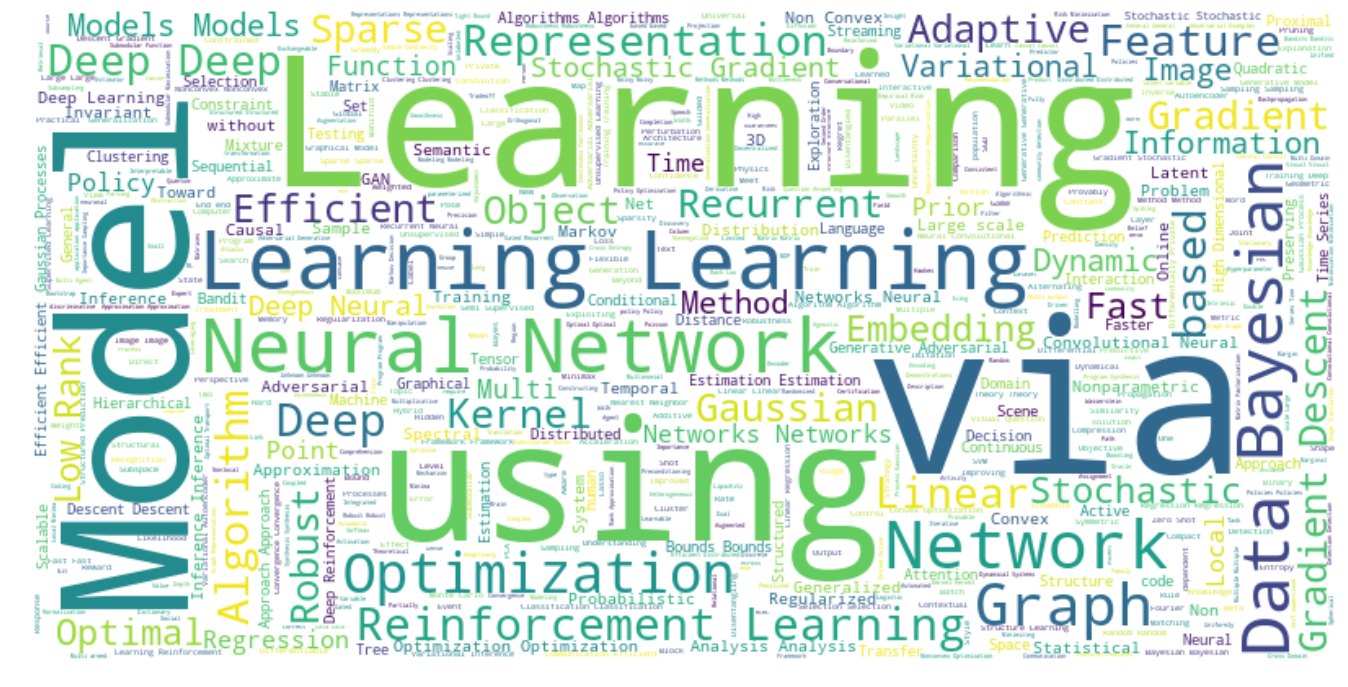

In [9]:
# show
plt.figure(figsize=(24, 12))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

 ## Extract Citations from Google Scholar Using Selenium

In [7]:
# create an object of class SeleniumWrapper, show path to chromedriver
filepath_chrome = 'C:/Users/tsyurmasto/Documents/Python Scripts/articles/chromedriver.exe'
seleniumwrapper = SeleniumWrapper('proxies.txt',filepath_chrome)

In [5]:
# run selenium wrapper parse function and save results into title_citations.csv and authors.csv
title_citations, authors = seleniumwrapper.selenium_parse(title_lst[:6000])

title_counter=1,run_counter=1,proxy=['192.169.197.146'],response=200
title_counter=1,run_counter=1,proxy=['190.152.180.58'],response=200
title_counter=1,run_counter=3,proxy=['134.249.141.155'],response=200
title_counter=1,run_counter=5,proxy=['190.103.31.177'],response=200
title_counter=2,run_counter=7,proxy=['185.52.117.38'],response=200
title_counter=2,run_counter=7,proxy=['186.249.208.223'],response=200
title_counter=2,run_counter=9,proxy=['166.62.83.128'],response=200
title_counter=2,run_counter=11,proxy=['131.0.234.82'],response=200
title_counter=3,run_counter=13,proxy=['128.199.217.139'],response=200
title_counter=3,run_counter=13,proxy=['85.206.57.202'],response=200
title_counter=3,run_counter=15,proxy=['85.111.9.81'],response=200
title_counter=3,run_counter=17,proxy=['109.110.29.89'],response=200
title_counter=3,run_counter=19,proxy=['85.248.6.41'],response=200
title_counter=4,run_counter=21,proxy=['85.94.167.73'],response=200
title_counter=4,run_counter=21,proxy=['212.42.113.4

title_counter=36,run_counter=159,proxy=['190.122.135.54'],response=200
title_counter=36,run_counter=159,proxy=['186.159.1.97'],response=200
title_counter=36,run_counter=161,proxy=['181.113.66.146'],response=200
title_counter=36,run_counter=163,proxy=['185.29.11.251'],response=200
title_counter=37,run_counter=165,proxy=['195.9.80.22'],response=200
title_counter=37,run_counter=165,proxy=['109.233.212.105'],response=200
title_counter=37,run_counter=167,proxy=['37.0.94.190'],response=200
title_counter=37,run_counter=169,proxy=['199.247.16.23'],response=200
name 'np' is not defined
title_counter=38,run_counter=171,proxy=['95.158.248.97'],response=200
title_counter=38,run_counter=173,proxy=['85.236.179.164'],response=200
title_counter=38,run_counter=175,proxy=['31.13.15.94'],response=200
name 'np' is not defined
title_counter=39,run_counter=177,proxy=['186.232.195.24'],response=200
title_counter=39,run_counter=179,proxy=['178.62.207.67'],response=200
title_counter=39,run_counter=181,proxy=['

title_counter=70,run_counter=365,proxy=['130.0.27.18'],response=200
title_counter=70,run_counter=367,proxy=['200.69.65.186'],response=200
name 'np' is not defined
title_counter=71,run_counter=369,proxy=['177.238.248.104'],response=200
title_counter=71,run_counter=371,proxy=['163.172.179.205'],response=200
title_counter=71,run_counter=373,proxy=['194.0.140.138'],response=200
name 'np' is not defined
title_counter=72,run_counter=375,proxy=['95.179.181.1'],response=200
title_counter=72,run_counter=377,proxy=['78.29.45.176'],response=200
title_counter=72,run_counter=379,proxy=['138.68.93.249'],response=200
name 'np' is not defined
title_counter=73,run_counter=381,proxy=['170.84.156.198'],response=200
title_counter=73,run_counter=383,proxy=['200.35.49.65'],response=200
title_counter=73,run_counter=385,proxy=['200.33.143.75'],response=200
name 'np' is not defined
title_counter=74,run_counter=387,proxy=['216.176.132.20'],response=200
title_counter=74,run_counter=389,proxy=['213.81.182.29'],re

title_counter=105,run_counter=575,proxy=['186.211.199.118'],response=200
title_counter=105,run_counter=577,proxy=['186.211.110.129'],response=200
name 'np' is not defined
title_counter=106,run_counter=579,proxy=['176.118.48.138'],response=200
title_counter=106,run_counter=581,proxy=['88.199.21.74'],response=200
title_counter=106,run_counter=583,proxy=['92.242.240.34'],response=200
name 'np' is not defined
title_counter=107,run_counter=585,proxy=['78.85.38.101'],response=200
title_counter=107,run_counter=587,proxy=['168.232.198.179'],response=200
title_counter=107,run_counter=589,proxy=['162.243.173.250'],response=200
name 'np' is not defined
title_counter=108,run_counter=591,proxy=['69.171.68.90'],response=200
title_counter=108,run_counter=593,proxy=['51.15.198.91'],response=200
title_counter=108,run_counter=595,proxy=['163.172.183.191'],response=200
name 'np' is not defined
title_counter=109,run_counter=597,proxy=['31.173.89.209'],response=200
title_counter=109,run_counter=599,proxy=[

title_counter=139,run_counter=775,proxy=['91.205.131.55'],response=200
title_counter=139,run_counter=777,proxy=['187.19.114.1'],response=200
title_counter=139,run_counter=779,proxy=['131.0.234.82'],response=200
name 'np' is not defined
title_counter=140,run_counter=781,proxy=['45.65.227.74'],response=200
title_counter=140,run_counter=783,proxy=['178.252.167.90'],response=200
title_counter=140,run_counter=785,proxy=['188.93.238.17'],response=200
name 'np' is not defined
title_counter=141,run_counter=787,proxy=['190.149.7.211'],response=200
title_counter=141,run_counter=789,proxy=['82.135.248.243'],response=200
title_counter=141,run_counter=791,proxy=['193.93.49.193'],response=200
name 'np' is not defined
title_counter=142,run_counter=793,proxy=['138.94.48.62'],response=200
title_counter=142,run_counter=795,proxy=['46.55.161.219'],response=200
title_counter=142,run_counter=797,proxy=['78.133.163.190'],response=200
name 'np' is not defined
title_counter=143,run_counter=799,proxy=['163.172

title_counter=173,run_counter=983,proxy=['185.61.92.178'],response=200
name 'np' is not defined
title_counter=174,run_counter=985,proxy=['86.62.120.68'],response=200
title_counter=174,run_counter=987,proxy=['212.90.59.242'],response=200
title_counter=174,run_counter=989,proxy=['177.128.209.58'],response=200
name 'np' is not defined
title_counter=175,run_counter=991,proxy=['190.63.144.29'],response=200
title_counter=175,run_counter=993,proxy=['84.1.150.59'],response=200
title_counter=175,run_counter=995,proxy=['212.243.175.126'],response=200
name 'np' is not defined
title_counter=176,run_counter=997,proxy=['94.253.39.7'],response=200
title_counter=176,run_counter=999,proxy=['46.160.84.179'],response=200
title_counter=176,run_counter=1001,proxy=['185.175.94.44'],response=200
name 'np' is not defined
title_counter=177,run_counter=1003,proxy=['190.109.164.105'],response=200
title_counter=177,run_counter=1005,proxy=['187.177.30.154'],response=200
title_counter=177,run_counter=1007,proxy=['1

title_counter=207,run_counter=1184,proxy=['109.75.46.23'],response=200
title_counter=207,run_counter=1186,proxy=['188.165.138.11'],response=200
name 'np' is not defined
title_counter=208,run_counter=1188,proxy=['188.241.45.85'],response=200
title_counter=208,run_counter=1190,proxy=['77.37.240.23'],response=200
title_counter=208,run_counter=1192,proxy=['177.38.33.42'],response=200
name 'np' is not defined
title_counter=209,run_counter=1194,proxy=['37.57.40.167'],response=200
title_counter=209,run_counter=1196,proxy=['177.231.249.218'],response=200
title_counter=209,run_counter=1198,proxy=['181.129.55.44'],response=200
name 'np' is not defined
title_counter=210,run_counter=1200,proxy=['178.218.58.234'],response=200
title_counter=210,run_counter=1202,proxy=['163.172.209.92'],response=200
title_counter=210,run_counter=1204,proxy=['186.224.138.82'],response=200
name 'np' is not defined
title_counter=211,run_counter=1206,proxy=['45.4.57.207'],response=200
title_counter=211,run_counter=1208,p

title_counter=240,run_counter=1382,proxy=['88.147.142.103'],response=200
name 'np' is not defined
title_counter=241,run_counter=1384,proxy=['47.244.136.33'],response=200
title_counter=241,run_counter=1386,proxy=['109.194.162.249'],response=200
title_counter=241,run_counter=1388,proxy=['157.230.164.220'],response=200
name 'np' is not defined
title_counter=242,run_counter=1390,proxy=['62.14.178.3'],response=200
title_counter=242,run_counter=1392,proxy=['177.69.37.22'],response=200
title_counter=242,run_counter=1394,proxy=['114.32.10.182'],response=200
name 'np' is not defined
title_counter=243,run_counter=1396,proxy=['45.65.227.17'],response=200
title_counter=243,run_counter=1398,proxy=['61.28.228.38'],response=200
title_counter=243,run_counter=1400,proxy=['72.252.161.224'],response=200
name 'np' is not defined
title_counter=244,run_counter=1402,proxy=['1.163.7.178'],response=200
title_counter=244,run_counter=1404,proxy=['217.153.241.204'],response=200
title_counter=244,run_counter=1406,

KeyboardInterrupt: 

In [21]:
# authors
authors = pd.read_csv('authors.csv')
for col in ['citations','h_index']: authors.loc[:,col] = authors.loc[:,col].apply(int)
authors.drop_duplicates().sort_values('citations',ascending=False).head(10)

,google_scholar_id,name,citations,h_index
36,ZpG_cJwAAAAJ&hl=en&oi=sra,Robert Tibshirani,307589,147
35,tQVe-fAAAAAJ&hl=en&oi=sra,Trevor Hastie,205098,128
11,7K34d7cAAAAJ&hl=en&oi=sra,Sebastian Thrun,100026,144
12,6m4wv6gAAAAJ&hl=en&oi=sra,Richard S. Sutton,76722,81
15,09kJn28AAAAJ&hl=en&oi=sra,Thomas Dietterich,38891,75
76,kPxa2w0AAAAJ&hl=en&oi=sra,Philip Torr,34118,84
82,vfT6-XIAAAAJ&hl=en&oi=sra,Quoc V. Le,33719,61
14,q92q8SMAAAAJ&hl=en&oi=sra,Satinder Singh,33620,68
13,nbpafUkAAAAJ&hl=en&oi=sra,David McAllester,24311,59
34,dJfEfJgAAAAJ&hl=en&oi=sra,Hui Zou,22899,32
